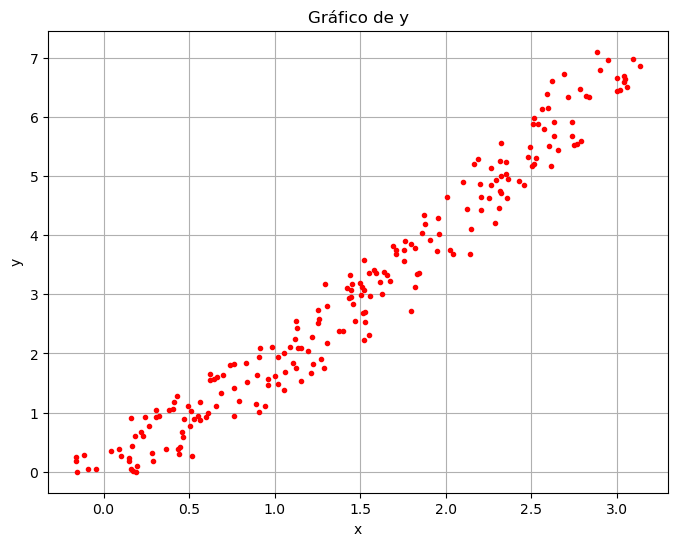

In [1]:
import csv
import matplotlib.pyplot as plt

x_vals = []
y_vals = []

with open('dados2.csv', 'r', newline='') as arquivo_csv:
    leitor_csv = csv.reader(arquivo_csv)
    next(leitor_csv) 
    for linha in leitor_csv:
        x_vals.append(float(linha[0]))
        y_vals.append(float(linha[1]))
     

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, 'ro', markersize=3)  
plt.title('Gráfico de y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Matriz A:
 [[  638.97796787  1452.69225942  3541.2362855 ]
 [ 1452.69225942  3541.2362855   9026.97657153]
 [ 3541.2362855   9026.97657153 23737.87415255]]
Matriz B:
 [1348.19682838 3112.08447012 7659.42778038]
Matriz dos coeficientes:
 [ 1.51521101  0.35678097 -0.03904924]
Erro total:
 28.92769423661848


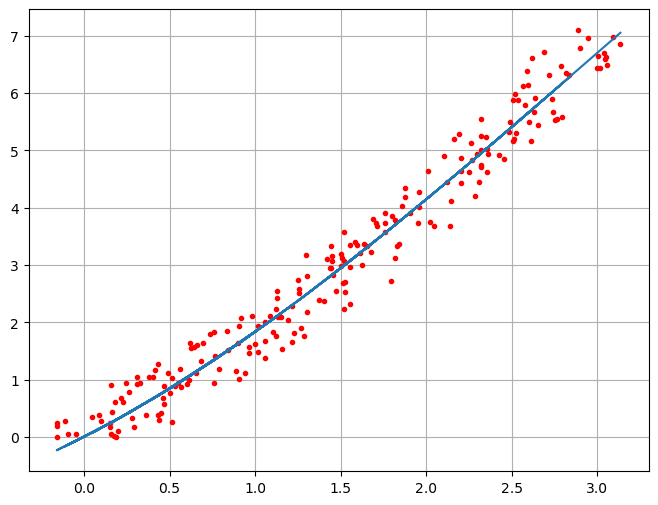

In [3]:
import numpy as np
x = np.array(x_vals)
y = np.array(y_vals)

FB = [lambda x: x, lambda x: x**2, lambda x: x**3]

dim = len(FB)
A = np.zeros((dim,dim))
B = np.zeros(dim)

for i in range(dim):
    B[i]= np.inner(FB[i](x),y)
    for j in range(dim):
        A[i,j] = np.inner(FB[i](x),FB[j](x))
        
print('Matriz A:\n', A)
print('Matriz B:\n',B)
a = np.linalg.solve(A,B)
print('Matriz dos coeficientes:\n',a)
def g (x):
    gg=0
    for i in range(dim):
        gg+=a[i]*FB[i](x)
    return gg

erro = 0
for i in range (len(x_vals)):
    erro += (g(x)[i]-y_vals[i])**2
    
print('Erro total:\n',erro)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'ro', markersize=3)
plt.plot(x,g(x))
plt.grid(True)
plt.show()